# Case Study 5

### Load Packages

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("log2.csv")

In [4]:
df.shape

(65532, 12)

In [5]:
display(df)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0


### Class Code

In [6]:
df['Action'].value_counts()

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

### EDA

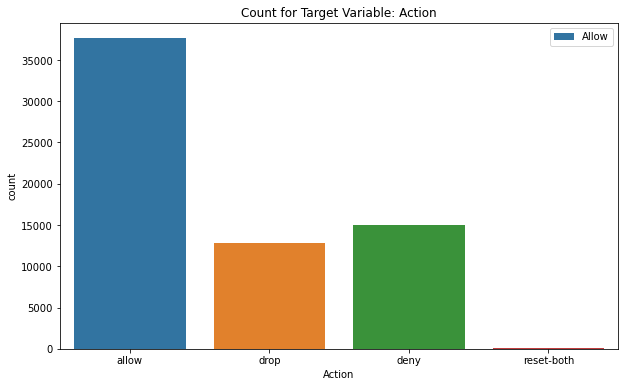

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Figure Size
plt.figure(figsize=(10, 6))

# Create the count plot with the 'hue' parameter for legend creation
sns.countplot(data=df, x='Action')

# Add a title
plt.title("Count for Target Variable: Action")

# Get current handles and labels
labels = ['Allow', 'Drop', 'Deny','Reset-Both']

# Set the legend
plt.legend(labels)

# Display the plot
plt.show()


## Data Preprocessing

### Addressing Missing Values

In [16]:
df.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

In [18]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

columns_with_nan = df.columns[df.isna().any()].tolist()

if len(columns_with_nan) > 0:
    # Calculate the proportion of missing values for each column
    plt.figure(figsize=(14, 8)) 
    missing_proportions = df2[columns_with_nan].isna().sum() / len(df)

    # Plot the proportions using a horizontal bar plot
    missing_proportions.plot(kind="barh", title="Proportion of Missing Values by Attributes")
    plt.xlabel('Proportion')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()
else:
    print("There are no columns with Missing Values.")


There are no columns with Missing Values.


### Addressing Duplicates

In [20]:
num_dupe = df.duplicated().sum()
print(f"There are {num_dupe} duplicated rows.")


There are 8362 duplicated rows.


In [21]:
df = df.drop_duplicates()

In [22]:
num_dupe = df.duplicated().sum()
print(f"There are {num_dupe} duplicated rows.")


There are 0 duplicated rows.


### EDA

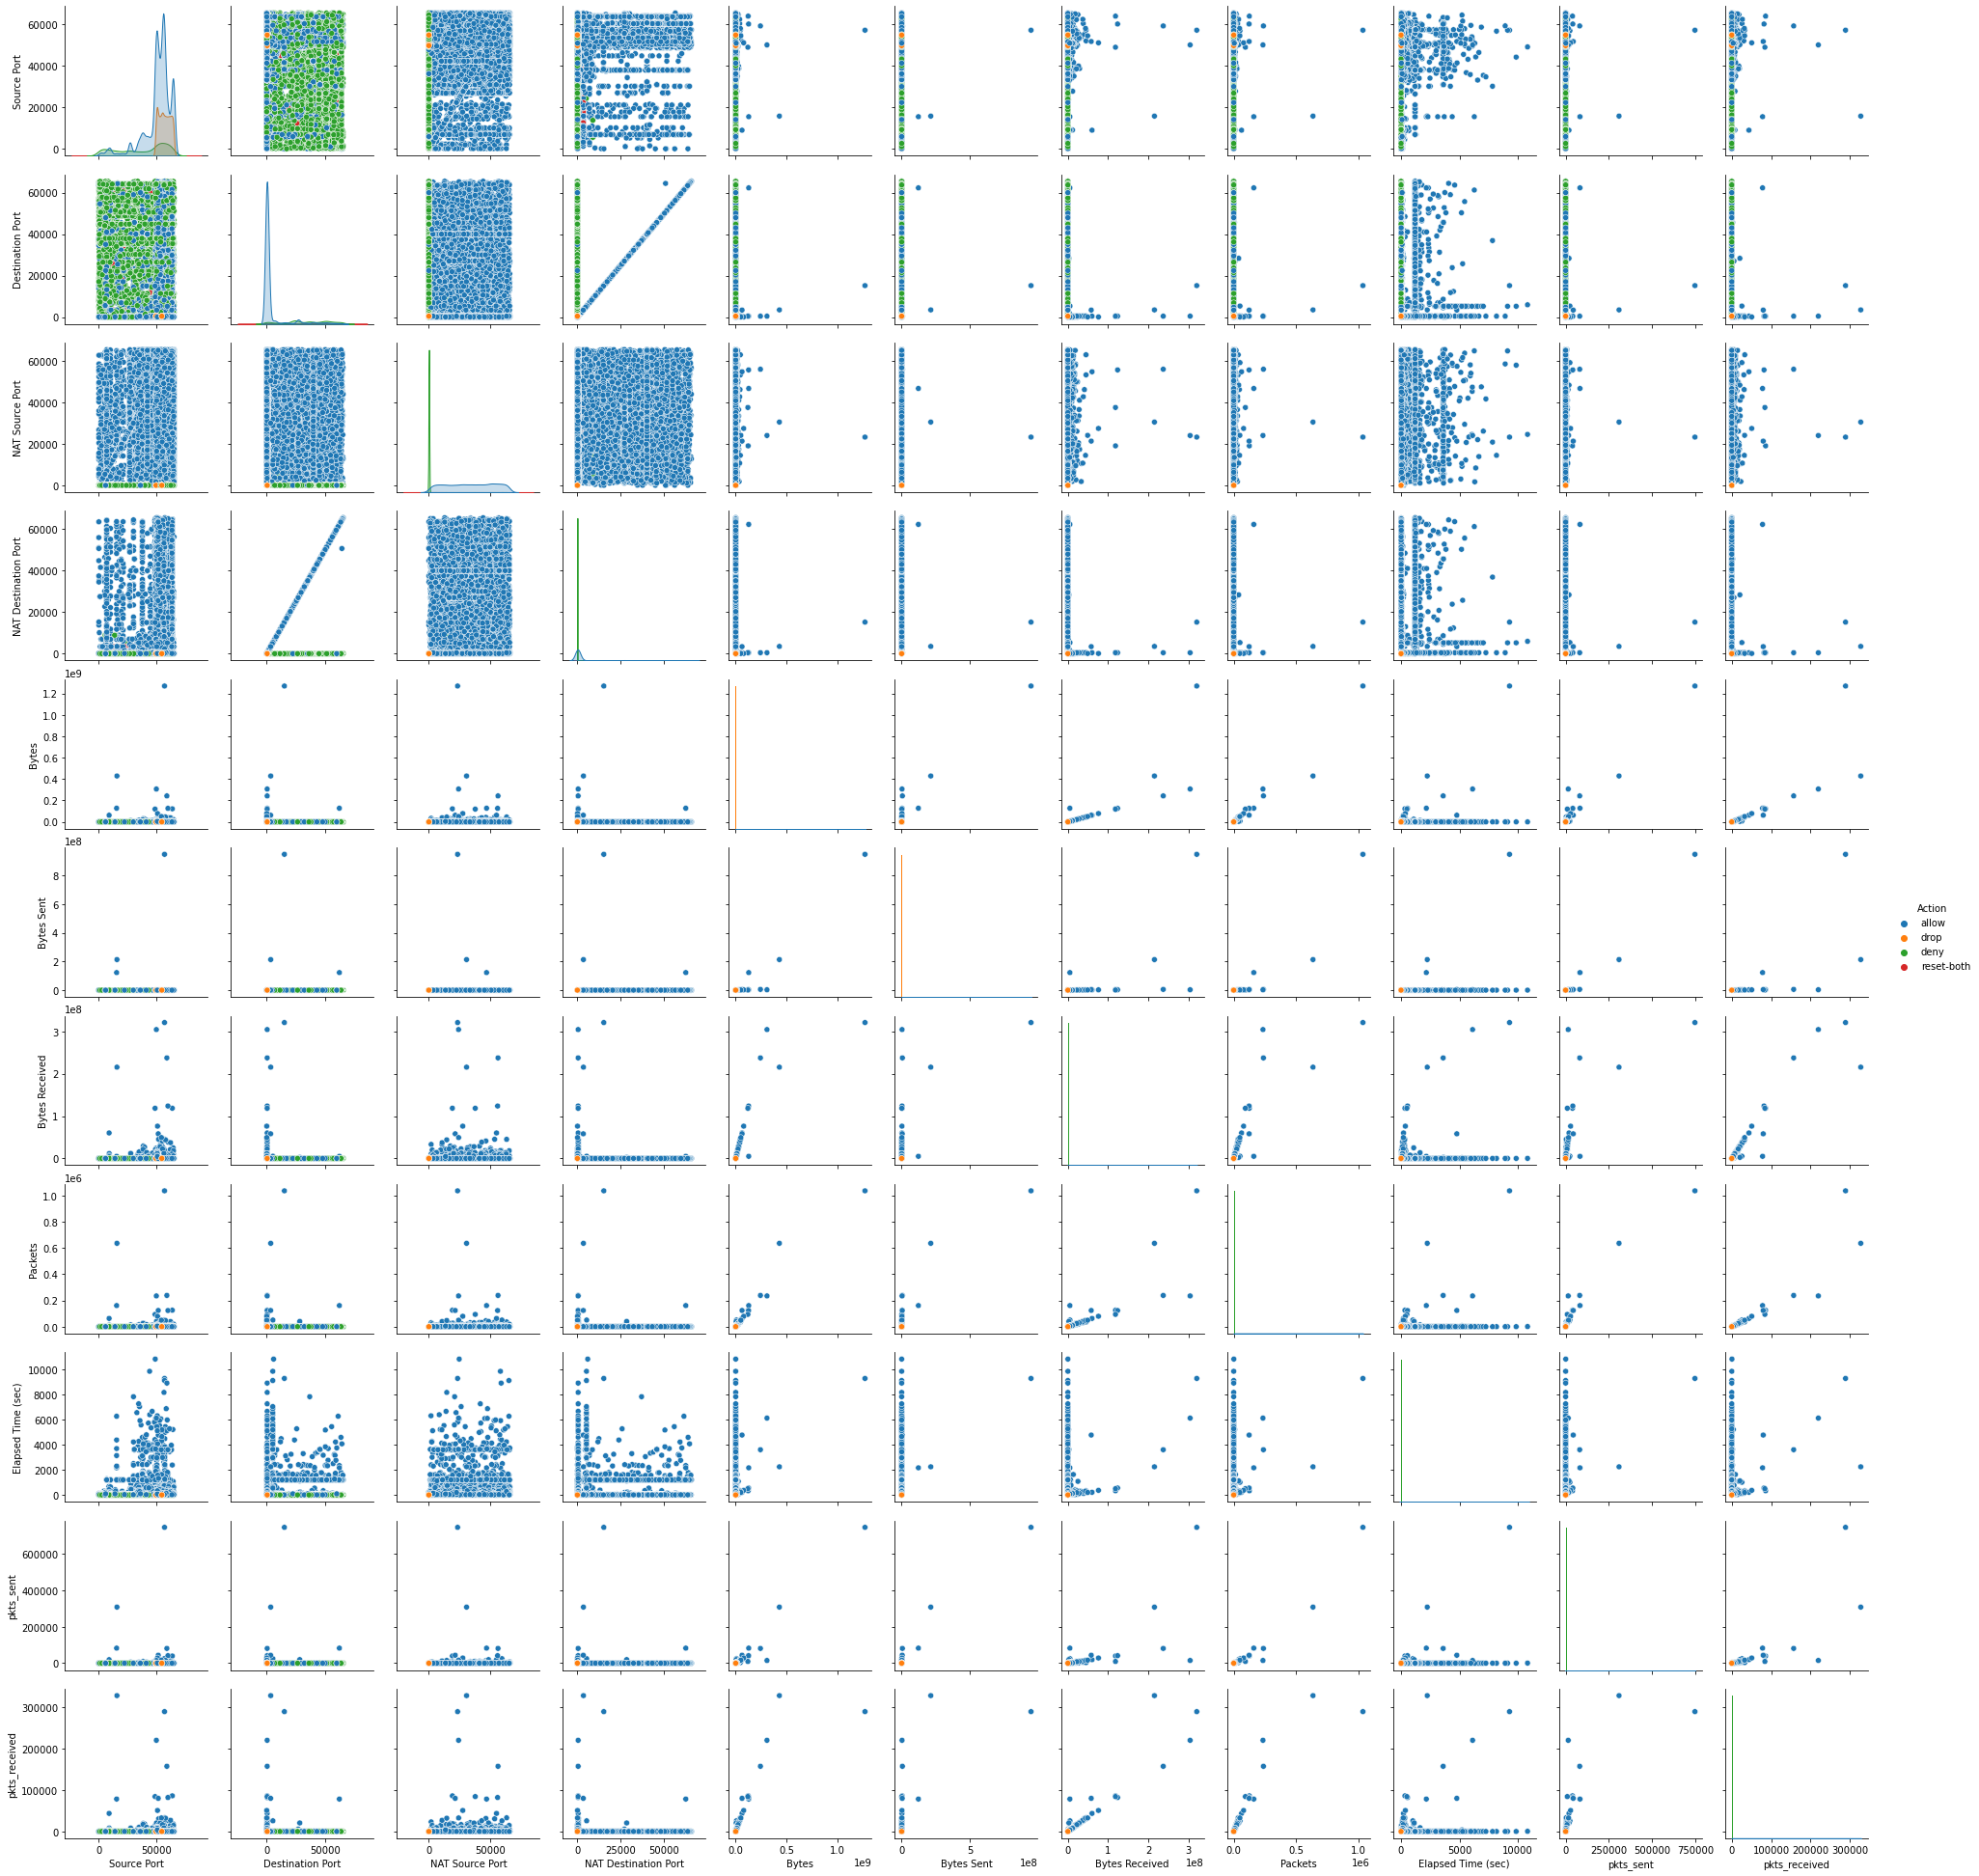

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot
#sns.pairplot(df, hue='Action')  # 'species' is a categorical variable for coloring
#plt.show()


## SVM

In [30]:
X = df.drop("Action", axis=1)
y = df["Action"]

In [24]:
from sklearn.svm import LinearSVC
dual = LinearSVC(dual=True)
primal = LinearSVC(dual=False)
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

In [ ]:
from sklearn.svm import SVC
#Train a Linear SVM
svm = SVC(kernel="linear")
svm.fit(X,y)